In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# run is specified by <entity>/<project>/<run_id>
runs = api.runs("qba/no rehersal small net MNIST Task IL")

# save the metrics for the run to a csv file
# metrics_dataframe = run.history()

In [2]:
for run in runs:
    print(run)

<Run qba/no+rehersal+small+net+MNIST+Task+IL/sd0lug7x (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/j9kark6r (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/uyugasuv (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/gv2vahbu (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/syuwu0uw (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/kmd3pmmy (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/cx9dxv0o (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/bbt7zck2 (finished)>


In [3]:
dfs = {}

for i in range(len(runs)):
    dfs[i] = runs[i].history()

In [4]:
acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']

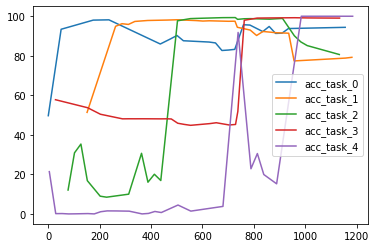

In [5]:
df = dfs[2]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

In [46]:
# task1 = df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task2 = df[[acc_col[1],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task3 = df[[acc_col[2],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task4 = df[[acc_col[3],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task5 = df[[acc_col[4],'_step']].dropna().sort_values(by='_step').set_index('_step').values

no_tasks = 5
task = {}
datapoints = {}
for j in range(no_tasks):
    task[j] = np.zeros((30,))
    datapoints[j] = np.zeros((30,))

for i in range(3,len(runs)):
    df = dfs[i]
    for j in range(no_tasks):
        curr_task = df[[acc_col[j],'_step']].dropna().sort_values(by='_step').set_index('_step').values.T[0]
        task[j] += np.concatenate([curr_task, [0 for _ in range(len(task[j])-len(curr_task))]])
        datapoints[j][:len(curr_task)] += 1

    # task1 += np.concatenate([df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values.T[0], [0 for _ in range(len(task1)-len(df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values))]])
    # task2 += df[[acc_col[1],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task3 += df[[acc_col[2],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task4 += df[[acc_col[3],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task5 += df[[acc_col[4],'_step']].dropna().sort_values(by='_step').set_index('_step').values

In [41]:
len(np.concatenate([curr_task, [0 for _ in range(len(task[j])-len(curr_task))]]))

29

In [45]:
j

4

In [42]:
len(curr_task)

29

In [44]:
curr_task

array([48.75432968, 48.75432968, 48.75432968, 48.75432968, 48.75432968,
       48.75432968, 48.75432968, 48.75432968, 49.61253357, 49.61253357,
       49.61253357, 49.61253357, 49.61253357, 49.61253357, 49.61253357,
       49.61253357, 49.61253357, 42.50788116, 42.50788116, 42.50788116,
       42.50788116, 42.50788116, 58.36220551, 58.36220551, 58.36220551,
       58.36220551, 58.36220551, 58.36220551, 58.36220551])

In [43]:
len(task[1])

27

In [7]:
datapoints

{0: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4.,
        4., 2., 2., 0., 0., 0., 0., 0.]),
 1: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4.,
        4., 2., 2., 0., 0., 0., 0., 0.]),
 2: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4.,
        4., 2., 2., 0., 0., 0., 0., 0.]),
 3: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4.,
        4., 2., 2., 0., 0., 0., 0., 0.]),
 4: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4.,
        4., 2., 2., 0., 0., 0., 0., 0.])}

In [17]:
task[0]/datapoints[0]

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\2058580265.py:1: RuntimeWarning: invalid value encountered in true_divide
  task[0]/datapoints[0]


array([54.88659363, 68.47731781, 69.49551849, 69.44611816, 79.20413742,
       79.29669571, 79.22226486, 79.22034683, 78.95678635, 79.02668076,
       68.68127899, 68.55005569, 68.22631912, 68.31038132, 65.54123764,
       57.61188602, 56.52625561, 57.832654  , 66.10990715, 67.01907539,
               nan,         nan,         nan,         nan,         nan])

In [20]:
task[1]/datapoints[1]

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\1084430831.py:1: RuntimeWarning: invalid value encountered in true_divide
  task[1]/datapoints[1]


array([54.88659363, 68.47731781, 69.49551849, 69.44611816, 79.20413742,
       79.29669571, 79.22226486, 79.22034683, 78.95678635, 79.02668076,
       68.68127899, 68.55005569, 68.22631912, 68.31038132, 65.54123764,
       57.61188602, 56.52625561, 57.832654  , 66.10990715, 67.01907539,
               nan,         nan,         nan,         nan,         nan])

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\3148928773.py:2: RuntimeWarning: invalid value encountered in true_divide
  line = task[i]/datapoints[i]


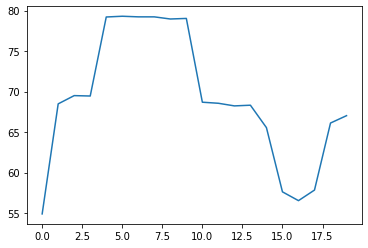

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\3148928773.py:2: RuntimeWarning: invalid value encountered in true_divide
  line = task[i]/datapoints[i]


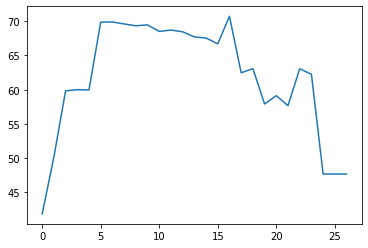

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\3148928773.py:2: RuntimeWarning: invalid value encountered in true_divide
  line = task[i]/datapoints[i]


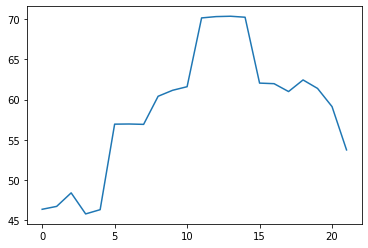

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\3148928773.py:2: RuntimeWarning: invalid value encountered in true_divide
  line = task[i]/datapoints[i]


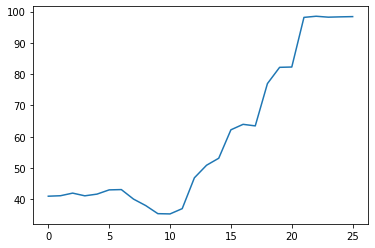

C:\Users\x270\AppData\Local\Temp\ipykernel_9936\3148928773.py:2: RuntimeWarning: invalid value encountered in true_divide
  line = task[i]/datapoints[i]


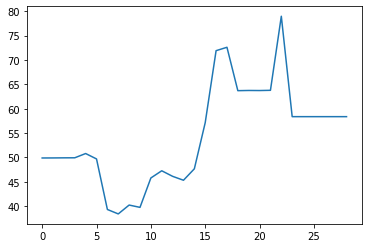

In [47]:
for i in range(len(task)):
    line = task[i]/datapoints[i]
    plt.plot(line)
    plt.show()